In [4]:
import numpy as np
from collections import defaultdict
from time import perf_counter_ns
from itertools import islice
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [15]:
from baseline import unique_configurations

In [16]:
VISITED = unique_configurations()

In [17]:
states = []
dists = []
for key, path in VISITED.items():
    states.append(np.frombuffer(key, dtype=np.uint8).astype(int))
    dists.append(len(path))
states = np.array(states)
dists = np.array(dists)

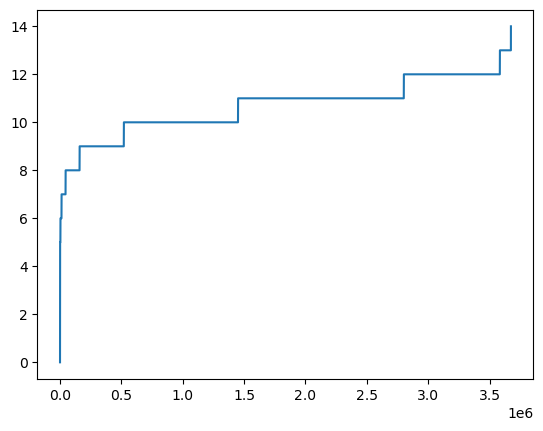

In [7]:
plt.plot(dists)

In [9]:
train = np.arange(len(states)) % 2 == 0
test  = ~train

In [10]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=6)
rf.fit(states[train], dists[train])

RandomForestClassifier(max_depth=6, n_jobs=-1)

In [11]:
de = np.array([ -5.3201, 118.7553, -80.4357,  -5.3201,  -5.3201,  -5.3201,  -5.3202,
         -5.3202,  -5.3201,  -5.3202,  -5.3205,  -5.3204,  -5.3204,  -5.3202,
         -5.3205,  -5.3202,  -5.3202,  -5.3201,  -5.3203,  -5.3202,  -5.3205,
        109.8844,  -5.3204,  -5.3202]).reshape(-1,1)

In [18]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100))
std = np.std(states[train], axis=0)
std[std == 0] = 1
mean = np.mean(states[train], axis=0)
X = (states[train] - mean)/std
y = dists[train]/14
mlp.fit(X, y)

MLPRegressor(hidden_layer_sizes=(100, 100))

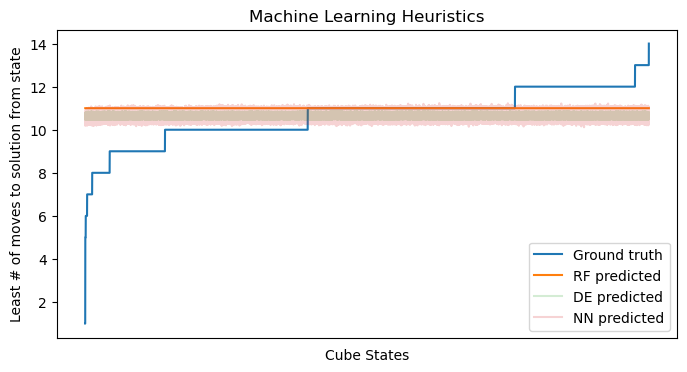

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,4)
ax.set_title('Machine Learning Heuristics')
ax.plot(dists[test], label='Ground truth')
ax.plot(rf.predict(states[test]), label='RF predicted')
ax.plot((states[test] @ de).ravel() * 14, label='DE predicted', alpha=0.2)
ax.plot(mlp.predict((states[test]-mean)/std)*14, label='NN predicted', alpha=0.2)

ax.set_xticks([])
ax.set_xlabel('Cube States')
ax.set_ylabel('Least # of moves to solution from state')
ax.legend()

In [50]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(states, dists)

RandomForestClassifier(n_jobs=-1)

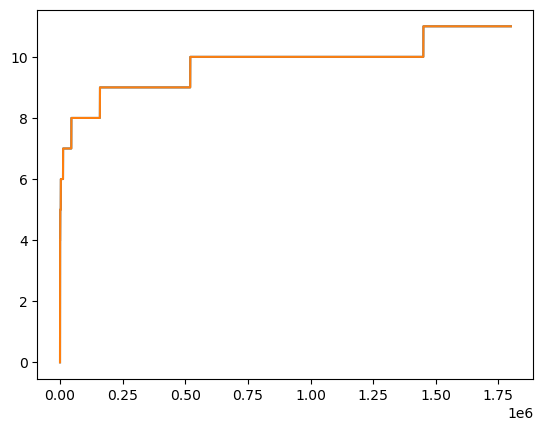

In [51]:
plt.plot(dists[:1_800_000])
plt.plot(rf.predict(states[:1_800_000]))

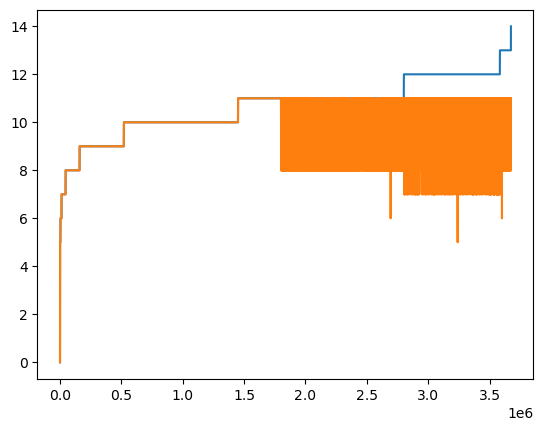

In [52]:
plt.plot(dists)
plt.plot(rf.predict(states))

In [ ]:
plt.plot(dists[:1_800_000])
plt.plot(rf.predict(states[:1_800_000]))

Text(0.5, 1.0, 'Constraining the Search Space')

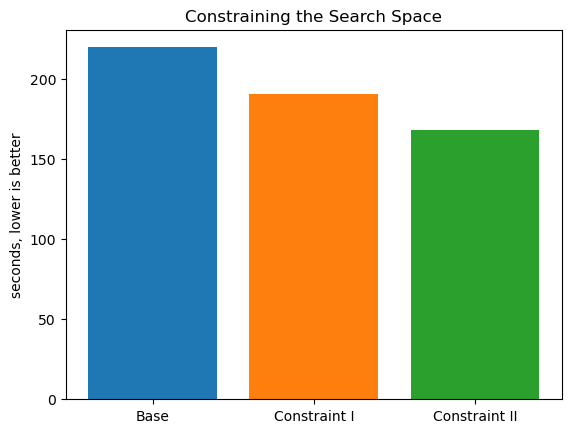

In [23]:
base = 220
con1 = 191
con2 = 168
fig, ax = plt.subplots(1,1)
ax.bar(np.arange(3), [220,0,0], label='base')
ax.bar(np.arange(3), [0,191,0], label='base')
ax.bar(np.arange(3), [0,0,168], label='base')
ax.set_xticks(range(3), ['Base', 'Constraint I', 'Constraint II'])
ax.set_ylabel('seconds, lower is better')
ax.set_title('Constraining the Search Space')
plt.savefigfigfigfigvef